<a href="https://colab.research.google.com/github/Rohithtechis/Clasification-of-algos/blob/main/Knn_NB_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the data
data=pd.read_csv('/content/ortho_knnnb.csv')
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [7]:
print('no of rows =',data.shape[0])
print('no of columns =',data.shape[1])

no of rows = 310
no of columns = 7


In [ ]:
#EDA on dataset

In [8]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [9]:
data.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [12]:
data['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

There are 210 Abnormals and 100 Normals.

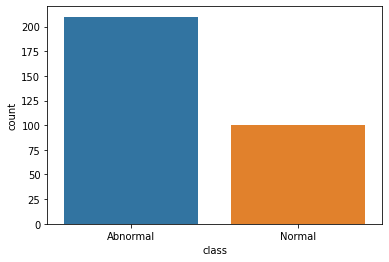

In [65]:
#ploting the graph.
sns.countplot(x='class',data=data)

In [14]:
#correlations
corr=data.corr()
corr

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


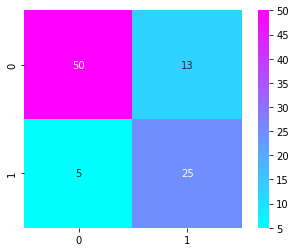

In [69]:
#Heat map of correlation 
sns.heatmap(corr,annot=True,cmap='cool',square=True) 

In [ ]:
# printing graphs to understand the relation between the variables

In [16]:
data.columns.unique()

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

{'boxes': [<matplotlib.lines.Line2D at 0x7f1dd3efafd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1dd3f0b0d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1dd3f13110>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1dd3f0bb90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1dd3f04610>,
  <matplotlib.lines.Line2D at 0x7f1dd3f04b50>]}

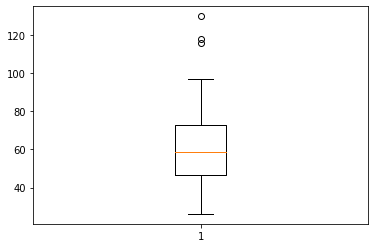

In [18]:
plt.boxplot(data['pelvic_incidence'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f1dd3e6ce90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1dd3e74ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1dd3e7af10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1dd3e7a9d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1dd3e74450>,
  <matplotlib.lines.Line2D at 0x7f1dd3e74990>]}

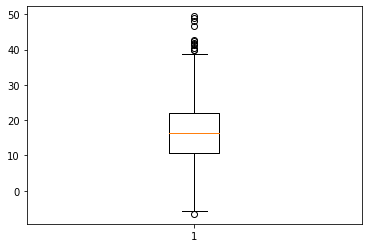

In [19]:
plt.boxplot(data['pelvic_tilt numeric'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f1dd3e5d850>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1dd3e60890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1dd3de88d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1dd3de8390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1dd3e5ddd0>,
  <matplotlib.lines.Line2D at 0x7f1dd3e60350>]}

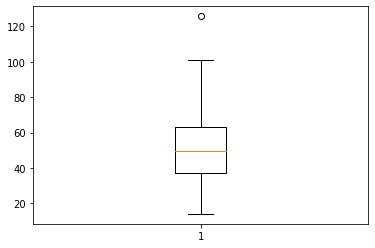

In [20]:
plt.boxplot(data['lumbar_lordosis_angle'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f1dd3dd0a50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1dd3dd4a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1dd3ddaad0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1dd3dda590>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1dd3dd0fd0>,
  <matplotlib.lines.Line2D at 0x7f1dd3dd4550>]}

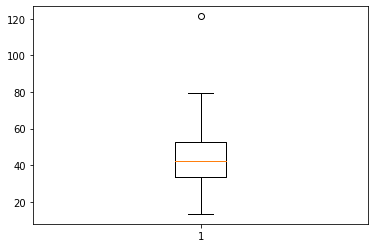

In [22]:
plt.boxplot(data['sacral_slope'])

In [ ]:
#prepairing data for training

In [24]:
df=data['class'].replace({'Abnormal':0,'Normal':1})
X=data.drop(['class'],axis=1)
Y=df.values

In [32]:
#Splitting the data were tarining data is 70,testing data is 30.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7)
print('train size is',X_train.shape)
print('test size is',X_test.shape)

train size is (217, 6)
test size is (93, 6)


In [44]:
# Training with KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_accuracy=[]
for k in range(3,10):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)
  train_pred=knn.predict(X_train)
  train_score=accuracy_score(train_pred,Y_train)
  test_pred= knn.predict(X_test)
  test_score=(round(accuracy_score(test_pred,Y_test)*100,2))
  test_accuracy.append(test_score)
  print("Test Accuracy: ",test_score,"Value of K: ",k)

Test Accuracy:  83.87 Value of K:  3
Test Accuracy:  82.8 Value of K:  4
Test Accuracy:  84.95 Value of K:  5
Test Accuracy:  84.95 Value of K:  6
Test Accuracy:  88.17 Value of K:  7
Test Accuracy:  86.02 Value of K:  8
Test Accuracy:  88.17 Value of K:  9


In [50]:
print('Good accuracy is',max(test_accuracy),'\n were K value is',k)

Good accuracy is 88.17 
 were K value is 9


In [51]:
# Training with naive bayes
from sklearn.naive_bayes import GaussianNB
nvclassifier=GaussianNB()
nvclassifier.fit(X_train,Y_train)
Y_pred=nvclassifier.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score
print("The Accuracy of the NB is",round(accuracy_score(Y_pred,Y_test)*100,2))

The Accuracy of the NB is 80.65


In [62]:
from sklearn.metrics import confusion_matrix
corr=confusion_matrix(Y_test,Y_pred)
corr

array([[50, 13],
       [ 5, 25]])